In [17]:
from datasets import load_metric
wer_metric = load_metric("wer")
cer_metric = load_metric("cer")

import pandas as pd
dev = pd.read_csv("17_dev.csv")
test = pd.read_csv("17_test.csv")

# Model: 18_normalized:
dev_wer = wer_metric.compute(predictions=dev["18_normalised_output"].values,
    references=dev.human_transcript)
test_wer = wer_metric.compute(predictions=test["18_normalised_output"].values,
    references=test.human_transcript)

dev_cer = cer_metric.compute(predictions=dev["18_normalised_output"].values,
    references=dev.human_transcript)
test_cer = cer_metric.compute(predictions=test["18_normalised_output"].values,
    references=test.human_transcript)

print(f"With normalized model: {dev_wer=:0.4f} , {dev_cer=:0.4f} ,")
print(f" (18_normalised)       {test_wer=:0.4f}, {test_cer=:0.4f},")

With normalized model: dev_wer=0.1036 , dev_cer=0.0314 ,
 (18_normalised)       test_wer=0.1015, test_cer=0.0304,


In [31]:
dev["wer"] = 1
dev["cer"] = 1

for i, row in dev.iterrows():
    wer = wer_metric.compute(predictions=[row["18_normalised_output"]], 
                            references=[row["human_transcript"]])
    cer = cer_metric.compute(predictions=[row["18_normalised_output"]], 
                            references=[row["human_transcript"]])

    dev.loc[i, "wer"] = wer
    dev.loc[i, "cer"] = cer

test["wer"] = 1
test["cer"] = 1

for i, row in test.iterrows():
    wer = wer_metric.compute(predictions=[row["18_normalised_output"]], 
                            references=[row["human_transcript"]])
    cer = cer_metric.compute(predictions=[row["18_normalised_output"]], 
                            references=[row["human_transcript"]])

    test.loc[i, "wer"] = wer
    test.loc[i, "cer"] = cer

In [32]:
dev.wer.mean(), dev.cer.mean()

(0.10797742667847861, 0.03166968538914991)

In [33]:
dev.wer.std(), dev.cer.std()

(0.14598355295575222, 0.05335197999595207)

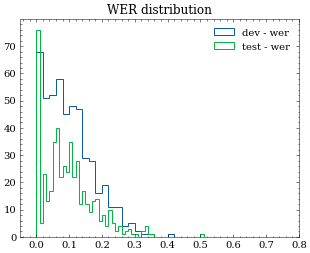

In [48]:
import matplotlib.pyplot as plt
plt.style.use(["science", "no-latex"])
plt.figure(figsize=(5,4))
plt.hist(dev.wer, bins=100, histtype="step", label="dev - wer")
#plt.hist(dev.cer, bins=100, histtype="step", label="dev - cer")

plt.hist(test.wer, bins=100, histtype="step", label="test - wer")
#plt.hist(test.cer, bins=100, histtype="step", label="test - cer")
plt.legend()
plt.xlim((-0.05, 0.8))
plt.title("WER distribution")
plt.savefig("images/20_wer_dev_test.png")
plt.show()

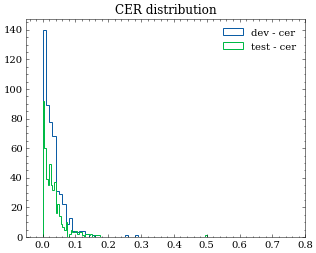

In [49]:
plt.figure(figsize=(5,4))
# plt.hist(dev.wer, bins=100, histtype="step", label="dev - wer")
plt.hist(dev.cer, bins=100, histtype="step", label="dev - cer")

# plt.hist(test.wer, bins=100, histtype="step", label="test - wer")
plt.hist(test.cer, bins=100, histtype="step", label="test - cer")
plt.legend()
plt.xlim((-0.05, 0.8))
plt.title("CER distribution")
plt.savefig("images/20_cer_dev_test.png")
plt.show()

In [54]:
d = dev[dev.wer>0.4]
d["split"]="dev"
d["Peter's verdict"] = ""

<ipython-input-54-47777c8ab885>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["split"]="dev"
<ipython-input-54-47777c8ab885>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["Peter's verdict"] = ""


In [57]:

d = pd.concat([d, test[test.wer>0.4]])

print(d.to_markdown())

|     | hashname                          | human_transcript                                                                                                                                                                                                                      | unnormalized_transcript                                                                                                                                                                                         | 18_normalised_output                                                                                                                                                                                                         |      wer |       cer | split   | Peter's verdict   |
|----:|:----------------------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------